# 1. bike 데이터셋

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bike_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝과 딥러닝/data/bike.csv')
bike_df

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
0,2018-01-01 0:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.60,310,NaN,NaN,20,Clouds
1,2018-01-01 1:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.60,310,NaN,NaN,1,Clear
2,2018-01-01 2:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.10,310,NaN,NaN,1,Clear
3,2018-01-01 3:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.10,310,NaN,NaN,1,Clear
4,2018-01-01 4:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.10,330,NaN,NaN,1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33374,2021-08-31 19:00,659,0,1,28.78,32.79,26.78,29.94,1007,73,0.45,339,1.00,NaN,90,Rain
33375,2021-08-31 20:00,404,0,1,28.52,32.37,26.34,29.84,1007,74,0.45,347,0.25,NaN,90,Rain
33376,2021-08-31 21:00,259,0,1,28.22,31.85,26.78,29.25,1007,75,0.45,327,NaN,NaN,90,Clouds
33377,2021-08-31 22:00,192,0,1,27.51,30.42,26.43,28.85,1004,76,2.06,60,NaN,NaN,90,Clouds


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33379 entries, 0 to 33378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      33379 non-null  object 
 1   count         33379 non-null  int64  
 2   holiday       33379 non-null  int64  
 3   workingday    33379 non-null  int64  
 4   temp          33379 non-null  float64
 5   feels_like    33379 non-null  float64
 6   temp_min      33379 non-null  float64
 7   temp_max      33379 non-null  float64
 8   pressure      33379 non-null  int64  
 9   humidity      33379 non-null  int64  
 10  wind_speed    33379 non-null  float64
 11  wind_deg      33379 non-null  int64  
 12  rain_1h       6771 non-null   float64
 13  snow_1h       326 non-null    float64
 14  clouds_all    33379 non-null  int64  
 15  weather_main  33379 non-null  object 
dtypes: float64(7), int64(7), object(2)
memory usage: 4.1+ MB


* datetime: 날짜
* count: 대여 개수
* holiday: 휴일
* workingday: 근무일
* temp: 기온
* feels_like: 체감온도
* temp_min: 최저온도
* temp_max: 최고온도
* pressure: 기압
* humidity: 습도
* wind_speed: 풍속
* wind_deg: 풍향
* rain_1h: 1시간당 내리는 비의 양
* snow_1h: 1시간당 내리는 눈의 양
* clouds_all: 구름의 양
* weather_main: 날씨

In [ ]:
bike_df.describe()

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all
count,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,6771.000000,326.000000,33379.000000
mean,333.139788,0.030618,0.681327,15.213087,14.994843,13.532648,16.105542,1017.071602,67.818628,1.829340,174.022919,1.216475,0.641380,63.213997
std,336.519514,0.172283,0.465969,9.908964,11.176487,9.993094,9.984839,7.379420,18.422105,1.703747,113.844334,2.056222,0.571087,30.825936
min,0.000000,0.000000,0.000000,-12.790000,-18.910000,-15.140000,-12.290000,980.000000,14.000000,0.000000,0.000000,0.100000,0.100000,0.000000
25%,59.000000,0.000000,0.000000,6.860000,5.880000,5.230000,7.730000,1012.000000,53.000000,0.450000,62.000000,0.250000,0.250000,40.000000
50%,236.000000,0.000000,1.000000,15.650000,15.020000,13.910000,16.590000,1017.000000,70.000000,1.340000,180.000000,0.530000,0.420000,75.000000
75%,495.000000,0.000000,1.000000,23.800000,24.140000,21.970000,24.390000,1022.000000,84.000000,2.600000,285.000000,1.300000,1.000000,90.000000
max,2038.000000,1.000000,1.000000,36.710000,43.710000,35.380000,38.810000,1044.000000,100.000000,16.980000,360.000000,54.050000,3.300000,100.000000


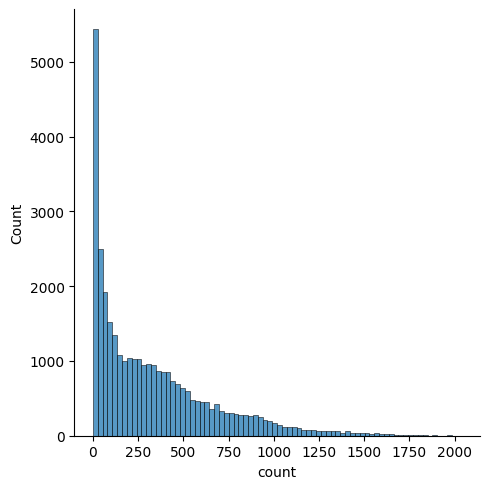

In [ ]:
sns.displot(bike_df['count'])

<Axes: ylabel='count'>

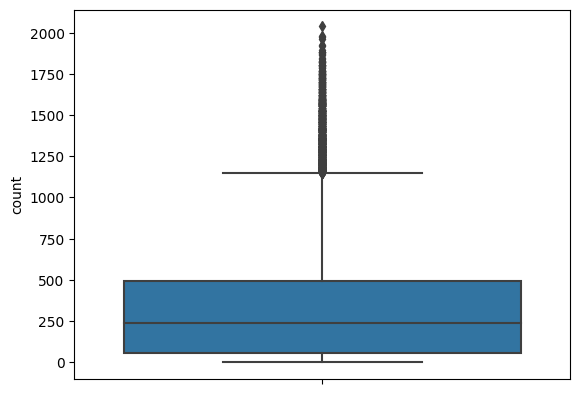

In [ ]:
sns.boxplot(y=bike_df['count'])

<Axes: xlabel='feels_like', ylabel='count'>

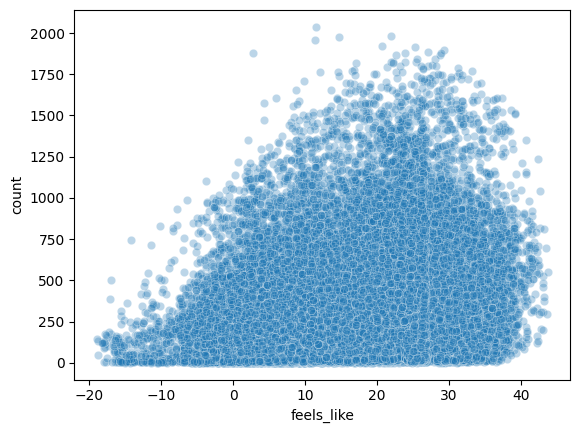

In [ ]:
sns.scatterplot(x='feels_like', y='count', data=bike_df, alpha=0.3)

<Axes: xlabel='pressure', ylabel='count'>

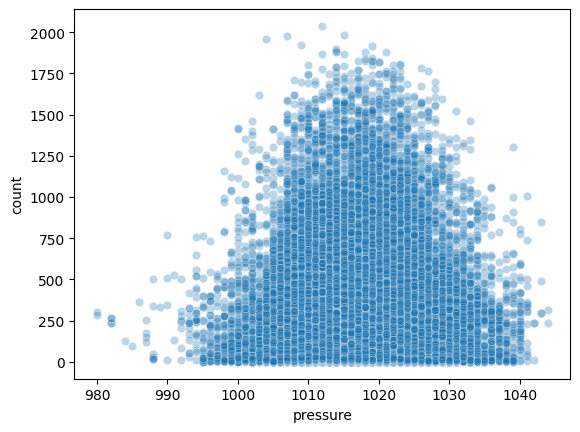

In [ ]:
sns.scatterplot(x='pressure',y='count',data=bike_df, alpha=0.3)

<Axes: xlabel='wind_speed', ylabel='count'>

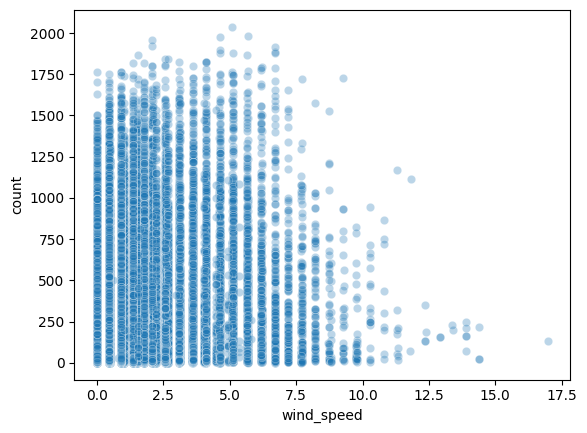

In [ ]:
sns.scatterplot(x='wind_speed', y='count',data=bike_df,alpha=0.3)

<Axes: xlabel='wind_deg', ylabel='count'>

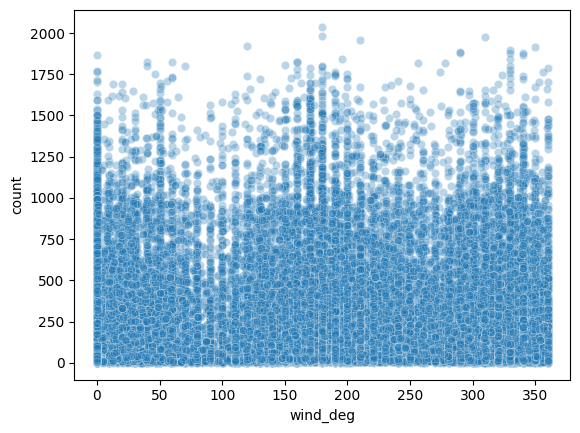

In [ ]:
sns.scatterplot(x='wind_deg', y='count',data=bike_df,alpha=0.3)

In [ ]:
bike_df.isna().sum()

datetime            0
count               0
holiday             0
workingday          0
temp                0
feels_like          0
temp_min            0
temp_max            0
pressure            0
humidity            0
wind_speed          0
wind_deg            0
rain_1h         26608
snow_1h         33053
clouds_all          0
weather_main        0
dtype: int64

In [ ]:
bike_df = bike_df.fillna(0)
bike_df.isna().sum()

datetime        0
count           0
holiday         0
workingday      0
temp            0
feels_like      0
temp_min        0
temp_max        0
pressure        0
humidity        0
wind_speed      0
wind_deg        0
rain_1h         0
snow_1h         0
clouds_all      0
weather_main    0
dtype: int64

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33379 entries, 0 to 33378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      33379 non-null  object 
 1   count         33379 non-null  int64  
 2   holiday       33379 non-null  int64  
 3   workingday    33379 non-null  int64  
 4   temp          33379 non-null  float64
 5   feels_like    33379 non-null  float64
 6   temp_min      33379 non-null  float64
 7   temp_max      33379 non-null  float64
 8   pressure      33379 non-null  int64  
 9   humidity      33379 non-null  int64  
 10  wind_speed    33379 non-null  float64
 11  wind_deg      33379 non-null  int64  
 12  rain_1h       33379 non-null  float64
 13  snow_1h       33379 non-null  float64
 14  clouds_all    33379 non-null  int64  
 15  weather_main  33379 non-null  object 
dtypes: float64(7), int64(7), object(2)
memory usage: 4.1+ MB


In [ ]:
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33379 entries, 0 to 33378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      33379 non-null  datetime64[ns]
 1   count         33379 non-null  int64         
 2   holiday       33379 non-null  int64         
 3   workingday    33379 non-null  int64         
 4   temp          33379 non-null  float64       
 5   feels_like    33379 non-null  float64       
 6   temp_min      33379 non-null  float64       
 7   temp_max      33379 non-null  float64       
 8   pressure      33379 non-null  int64         
 9   humidity      33379 non-null  int64         
 10  wind_speed    33379 non-null  float64       
 11  wind_deg      33379 non-null  int64         
 12  rain_1h       33379 non-null  float64       
 13  snow_1h       33379 non-null  float64       
 14  clouds_all    33379 non-null  int64         
 15  weather_main  33379 non-null  object

In [ ]:
bike_df

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
0,2018-01-01 00:00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.60,310,0.00,0.0,20,Clouds
1,2018-01-01 01:00:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.60,310,0.00,0.0,1,Clear
2,2018-01-01 02:00:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.10,310,0.00,0.0,1,Clear
3,2018-01-01 03:00:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.10,310,0.00,0.0,1,Clear
4,2018-01-01 04:00:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.10,330,0.00,0.0,1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33374,2021-08-31 19:00:00,659,0,1,28.78,32.79,26.78,29.94,1007,73,0.45,339,1.00,0.0,90,Rain
33375,2021-08-31 20:00:00,404,0,1,28.52,32.37,26.34,29.84,1007,74,0.45,347,0.25,0.0,90,Rain
33376,2021-08-31 21:00:00,259,0,1,28.22,31.85,26.78,29.25,1007,75,0.45,327,0.00,0.0,90,Clouds
33377,2021-08-31 22:00:00,192,0,1,27.51,30.42,26.43,28.85,1004,76,2.06,60,0.00,0.0,90,Clouds


In [ ]:
bike_df['year'] =  bike_df['datetime'].dt.year
bike_df['month'] =  bike_df['datetime'].dt.month
bike_df['hour'] =  bike_df['datetime'].dt.hour
bike_df.head()

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,month,hour
0,2018-01-01 00:00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds,2018,1,0
1,2018-01-01 01:00:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear,2018,1,1
2,2018-01-01 02:00:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear,2018,1,2
3,2018-01-01 03:00:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,0.0,0.0,1,Clear,2018,1,3
4,2018-01-01 04:00:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,0.0,0.0,1,Clear,2018,1,4


In [ ]:
bike_df['date'] = bike_df['datetime'].dt.date
bike_df.head()

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,month,hour,date
0,2018-01-01 00:00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds,2018,1,0,2018-01-01
1,2018-01-01 01:00:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear,2018,1,1,2018-01-01
2,2018-01-01 02:00:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear,2018,1,2,2018-01-01
3,2018-01-01 03:00:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,0.0,0.0,1,Clear,2018,1,3,2018-01-01
4,2018-01-01 04:00:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,0.0,0.0,1,Clear,2018,1,4,2018-01-01


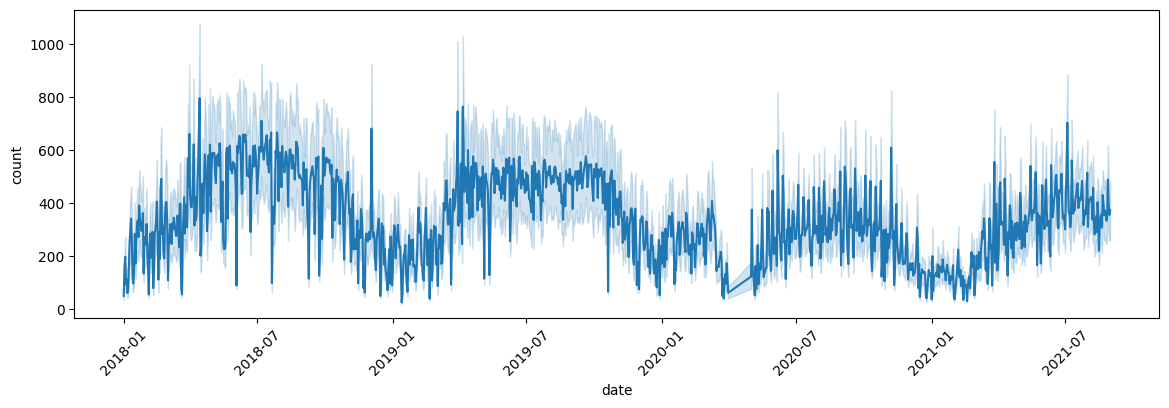

In [ ]:
plt.figure(figsize=(14,4))
sns.lineplot(x='date', y='count', data=bike_df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# covid
# 2020-04-1 이후 ~2021-4-1 이전 : covid
#2021-4-1 이후 : postcovid


def covid(date):
  if str(date) < '2020-04-01':
    return 'precovid'

  elif str(date) < '2021-04-01':
    return 'covid'

  else:
    return 'postcovid'

In [ ]:
bike_df['date'].apply(covid)

0         precovid
1         precovid
2         precovid
3         precovid
4         precovid
           ...    
33374    postcovid
33375    postcovid
33376    postcovid
33377    postcovid
33378    postcovid
Name: date, Length: 33379, dtype: object

In [ ]:
bike_df['covid'] = bike_df['date'].apply(lambda date: 'precovid' if str(date) < '2020-04-01' else 'covid' if str(date) < '2021-04-01' else 'postcovid')

In [ ]:
# season
# 12월 ~ 2월 : winter
# 3월~5월 : spring
# 6월_8월 : summmer


# covid
# 2020-04-1 이후 ~2021-4-1 이전 : covid
#2021-4-1 이후 : postcovid

bike_df['season'] = bike_df['month'].apply(lambda x: 'winter' if x == 12 else 'fall' if x>=9 else 'summer' if x >= 6 else 'spring' if x>=3 else 'winter')
bike_df[['month', 'season']]



,month,season
0,1,winter
1,1,winter
2,1,winter
3,1,winter
4,1,winter
...,...,...
33374,8,summer
33375,8,summer
33376,8,summer
33377,8,summer


In [ ]:
# day_night
# 21 이후 ~ : night
# 19 이후 ~ : late evening
# 17 이후 ~ : early evening
# 16 이후 ~ : lage afternoon
# 13 이후 ~ : early afternoon
# 11 이후~ : late moring
# 5 이후  : early morning

bike_df['day_night'] = bike_df['hour'].apply(lambda x: 'night' if x >= 21
                                             else 'late evening' if x >= 19
                                             else 'early evening' if x >= 17
                                             else 'late afternoon' if x >= 16
                                             else 'early afternoon' if x >= 13
                                             else 'late morning' if x >= 11
                                             else 'early morning' if x >= 5
                                             else 'night')
bike_df.head()
bike_df.drop(['datetime', 'month', 'date', 'hour'], axis=1,inplace=True)
bike_df.head()


# def day_night(datetime):
#     if datetime.hour >= 21:
#         return 'night'
#     elif datetime.hour >= 19:
#         return 'late evening'
#     elif datetime.hour >= 17:
#         return 'early evening'
#     elif datetime.hour >= 16:
#         return 'late afternoon'
#     elif datetime.hour >= 13:
#         return 'early afternoon'
#     elif datetime.hour >= 11:
#         return 'late morning'
#     elif datetime.hour >= 5:
#         return 'early morning'

# bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])

# bike_df['day_night'] = bike_df['datetime'].apply(day_night)

# bike_df['datetime']


,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,covid,season,day_night
0,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds,2018,precovid,winter,night
1,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear,2018,precovid,winter,night
2,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear,2018,precovid,winter,night
3,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,0.0,0.0,1,Clear,2018,precovid,winter,night
4,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,0.0,0.0,1,Clear,2018,precovid,winter,night


In [ ]:
for i in ['weather_main', 'covid', 'season','day_night']:
  print(i, bike_df[i].nunique())

weather_main 11
covid 3
season 4
day_night 7


In [ ]:
bike_df['weather_main'].unique()

array(['Clouds', 'Clear', 'Snow', 'Mist', 'Rain', 'Fog', 'Drizzle',
       'Haze', 'Thunderstorm', 'Smoke', 'Squall'], dtype=object)

In [ ]:
bike_df = pd.get_dummies(bike_df, columns=['weather_main','covid','season','day_night'])
bike_df.head()

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,covid_covid,covid_postcovid,covid_precovid,season_fall,season_spring,season_summer,season_winter,day_night_early afternoon,day_night_early evening,day_night_early morning,day_night_late afternoon,day_night_late evening,day_night_late morning,day_night_night
0,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,2018,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
2,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,0.0,0.0,1,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,0.0,0.0,1,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
pd.set_option('display.max_columns',50)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bike_df.drop('count', axis=1), bike_df['count'], test_size=0.2, random_state=2023)

# 2. 의사 결정 나무( Decision Tree)
- 데이터를 분석하고 패턴을 파악하여 결정 규칙을 나무  구조로 나타난 기계학습 알고리즘
- 간단하고 강력한 모델 중 하나로, 분류와 회귀 문제에 모두 사용
- 지니계수(지니 불순도, Gini Impurity): 분류 문제에서 특정 노드의 불순도를 나타내는데, 도드가 포함하는 클래스들이 혼잡되어 있는 정도를 나타냄
 - 0에서 1까지의 값을 가지며, 0에 가까울 수록 노드의 값이 불순도가 없음을 의미
- 엔트로피 : 어떤 집합이나 데이터의 불확실성, 혼잡도를 나타내는데, 노드의 불순도를 측정하는데 활용
 - 0에서 무한대까지의 값을 가지며, 0에 가까울수록 노드의 값이 불순도가 없음을 의미
 - 로그 연산이 포함되어 있어 계산이 복잡
- 오버피팅(과적합): 하습데이터에서는 정확하나 테스트데이터에서는 성과가 나쁜 현상을 말함. 의사 결정 나무는 오버피팅이 매우 잘 일어남
  - 오버피팅을 방지하는 방법
    - 사전 가지치기 : 나무가 다 자라기 전에 알고리즘을 멈추는 방법
    - 사후 가지치기 : 나무를 끝까지 돌린 후 밑에서부터 가지를 쳐나가는 방법


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor(random_state=2023)

In [ ]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2023)

In [ ]:
pred1 = dtr.predict(X_test)

<Axes: xlabel='count'>

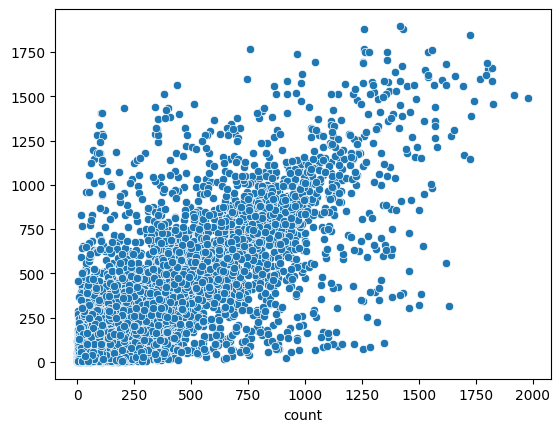

In [ ]:
sns.scatterplot(x=y_test,y=pred1)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,pred1, squared=False)

222.90547303762153

# 3. 선형 회귀 vs 의사 결정 나무

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred2 = lr.predict(X_test)


<Axes: xlabel='count'>

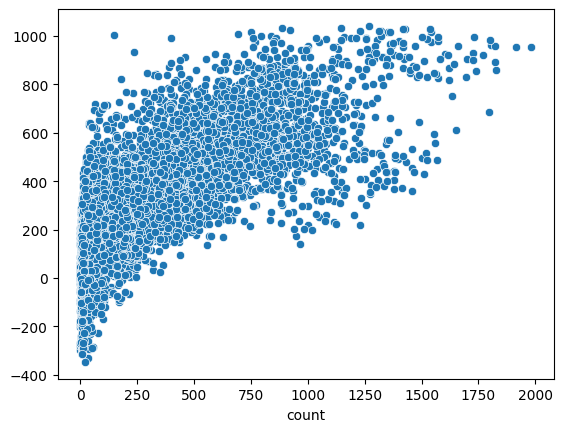

In [ ]:
sns.scatterplot(x=y_test,y=pred2)

In [ ]:
mean_squared_error(y_test,pred2,squared=False)

224.5257704711731

In [ ]:
# 의사 결정 나무 :
# 선형 회귀 :


In [ ]:
# 하이퍼 파라미터 적용
dtr = DecisionTreeRegressor(random_state=2023, max_depth=50,min_samples_leaf=30)

In [ ]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=50, min_samples_leaf=30, random_state=2023)

In [ ]:
pred3 = dtr.predict(X_test)

In [ ]:
mean_squared_error(y_test,pred3, squared=False)

186.56448037541028

In [ ]:
# 의사 결정 나무 :
# 선형 회귀 :


In [ ]:
from sklearn.tree import plot_tree

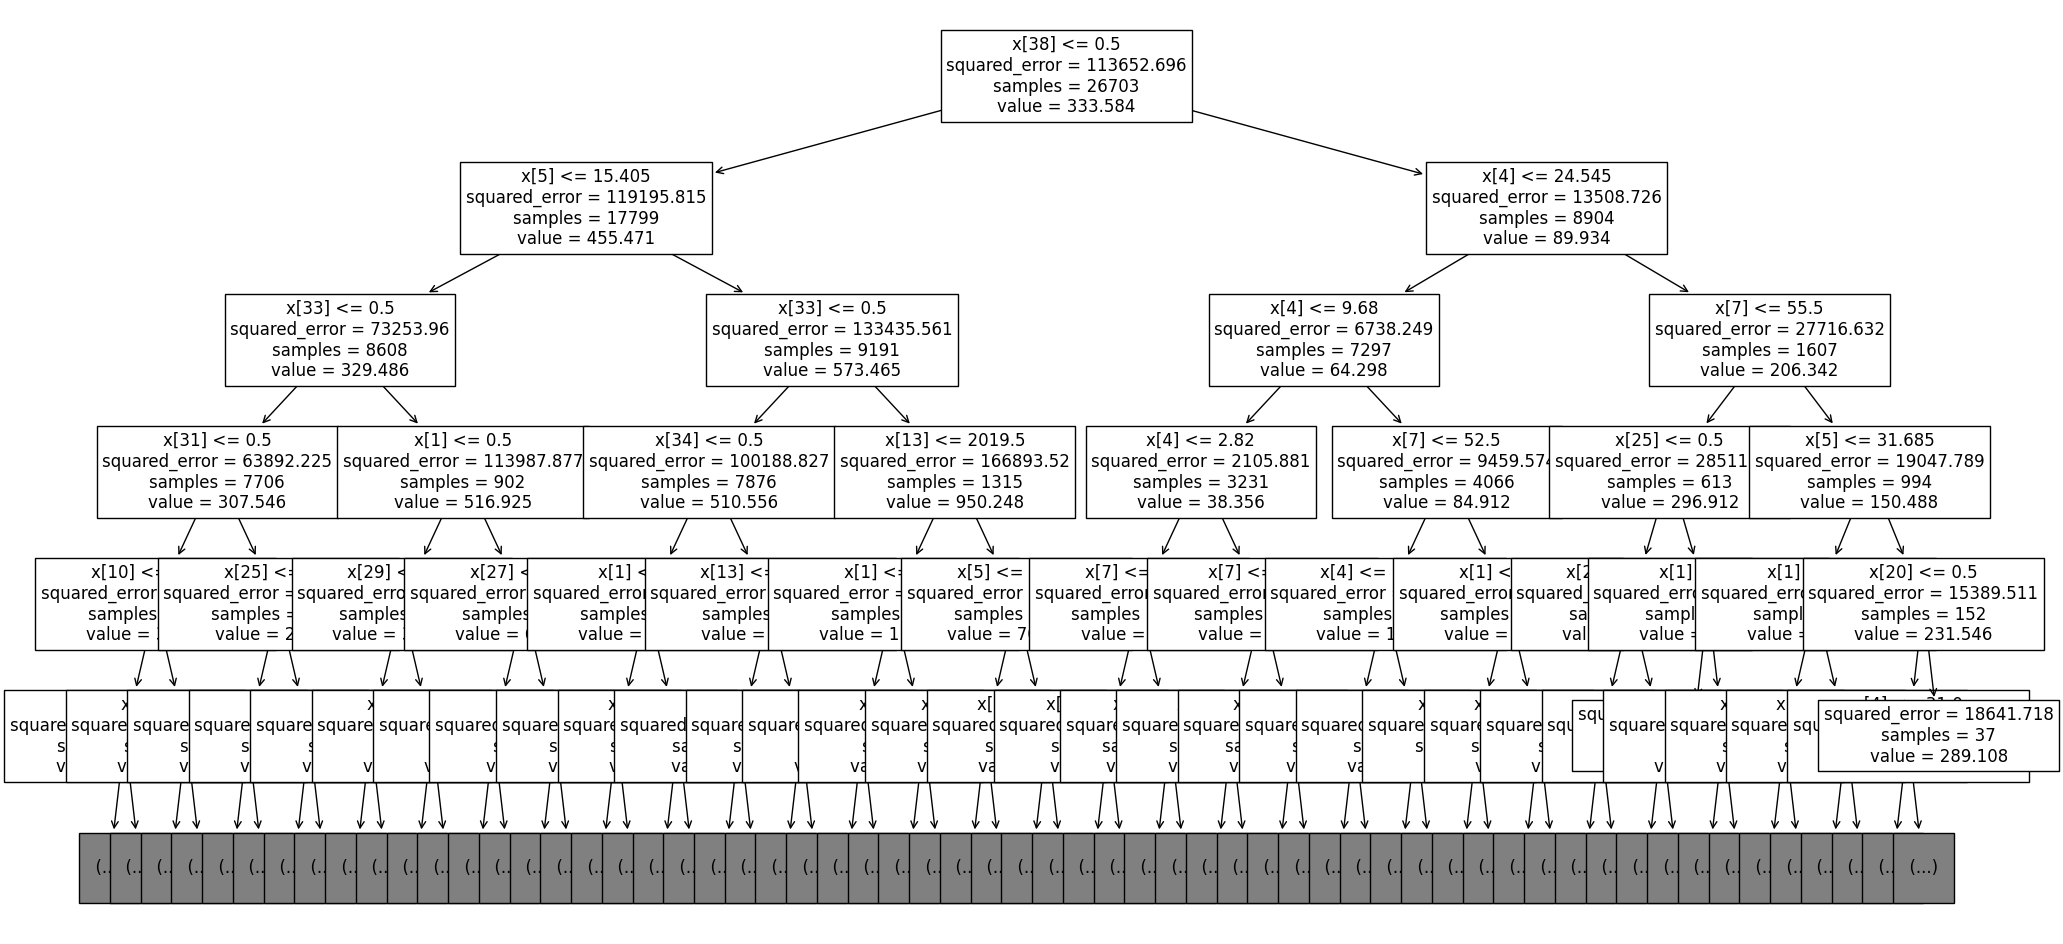

In [ ]:
plt.figure(figsize=(24,12))
plot_tree(dtr,max_depth=5,fontsize=12)
plt.show()

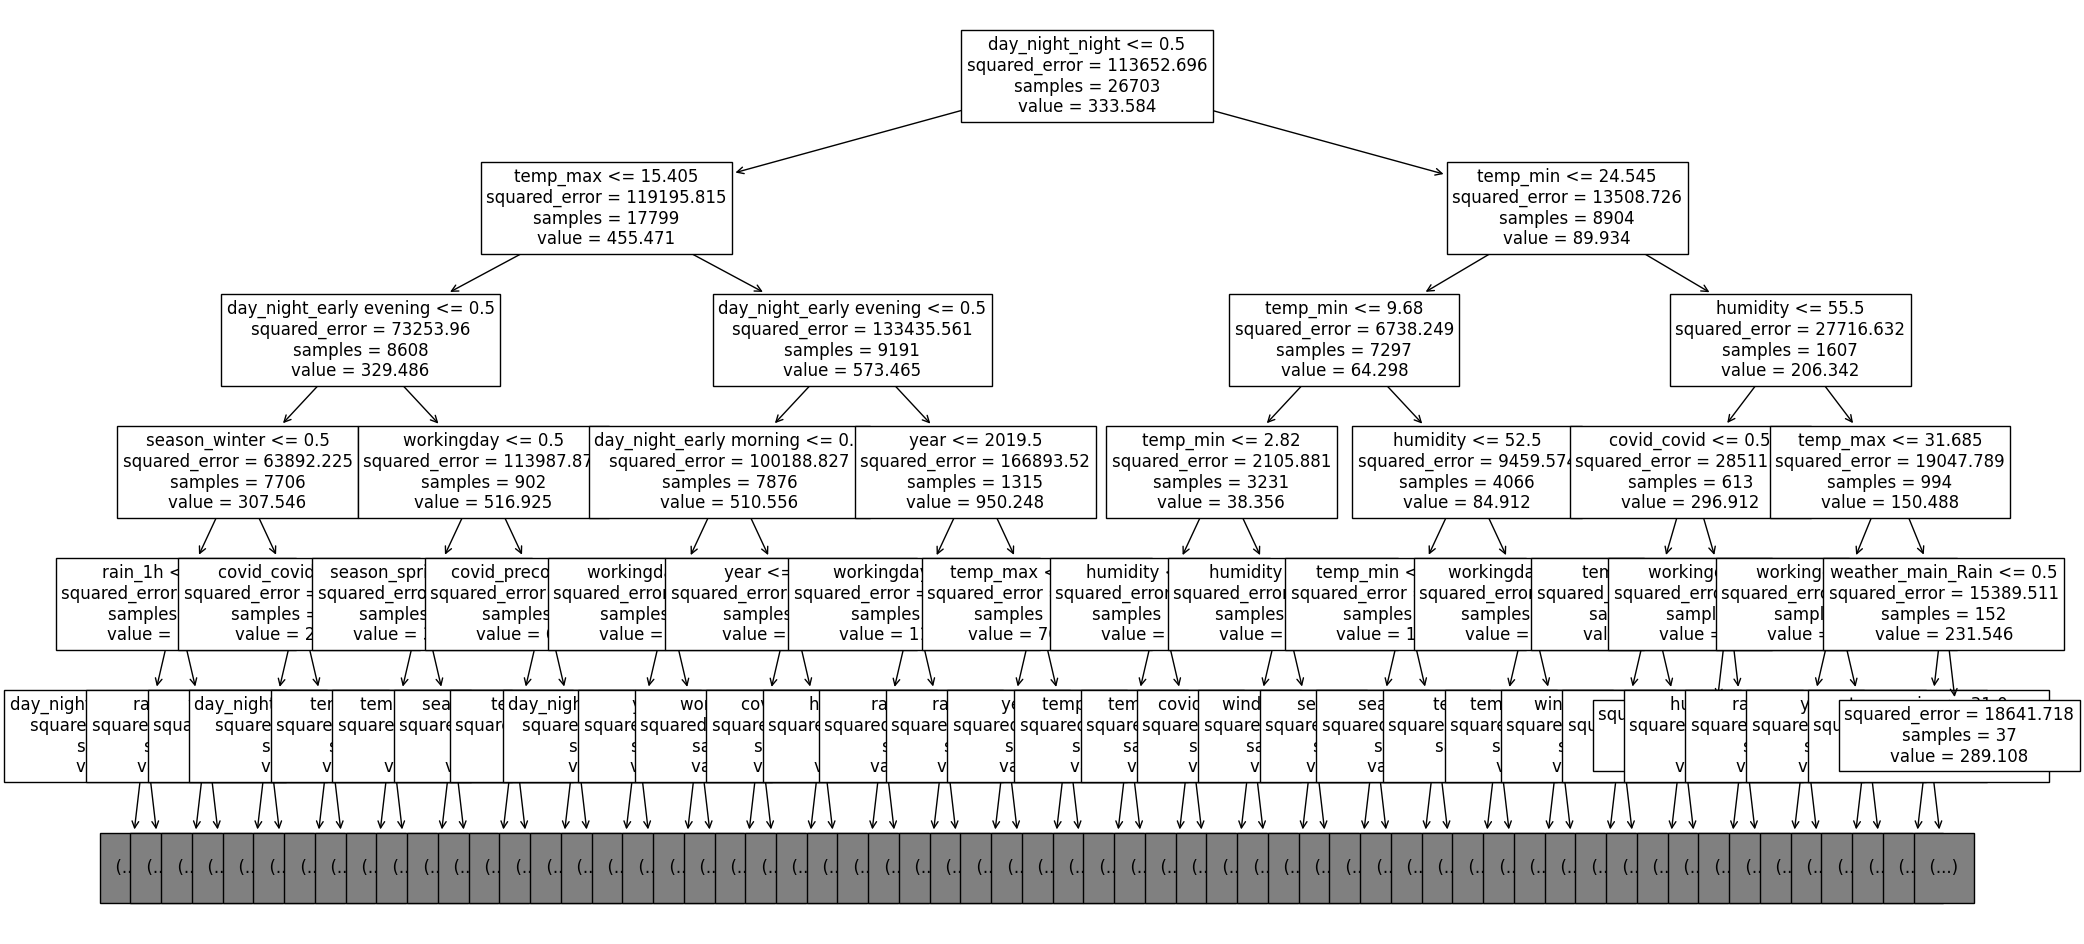

In [ ]:
plt.figure(figsize=(24,12))
plot_tree(dtr,max_depth=5,fontsize=12, feature_names=X_train.columns)
plt.show()

# 1. hr 데이터셋

In [ ]:
import numpy as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
hr_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝과 딥러닝/data/hr.csv')
hr_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [ ]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


* employee_id: 임의의 직원 아이디
* department: 부서
* region: 지역
* education: 학력
* gender: 성별
* recruitment_channel: 채용 방법
* no_of_trainings: 트레이닝 받은 횟수
* age: 나이
* previous_year_rating: 이전 년도 고과 점수
* length_of_service: 근속 년수
* awards_won: 수상 경력
* avg_training_score: 평균 고과 점수
* is_promoted: 승진 여부

<Axes: xlabel='previous_year_rating', ylabel='is_promoted'>

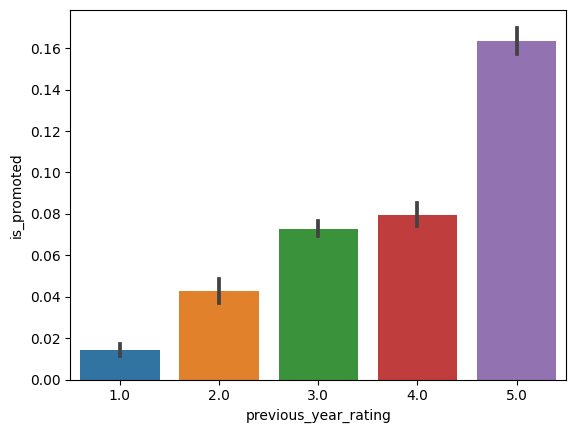

In [ ]:
sns.barplot(x='previous_year_rating',y='is_promoted',data=hr_df)

<Axes: xlabel='previous_year_rating', ylabel='is_promoted'>

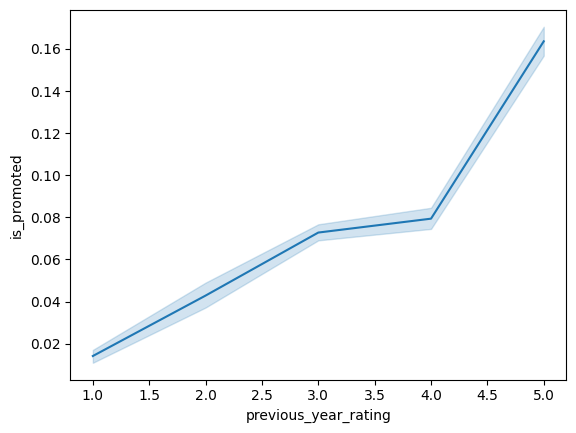

In [ ]:
sns.lineplot(x='previous_year_rating',y='is_promoted',data=hr_df)

<Axes: xlabel='avg_training_score', ylabel='is_promoted'>

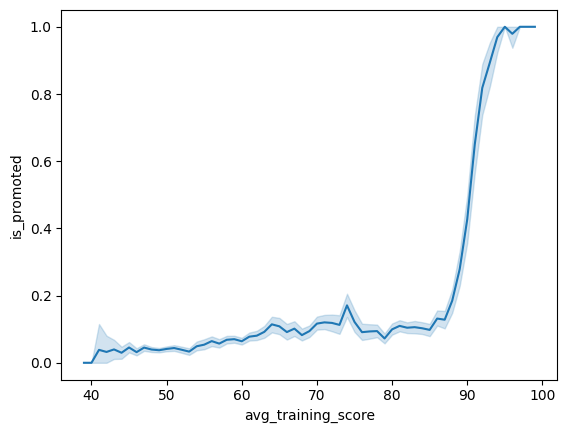

In [ ]:
sns.lineplot(x='avg_training_score',y='is_promoted',data=hr_df)

<Axes: xlabel='recruitment_channel', ylabel='is_promoted'>

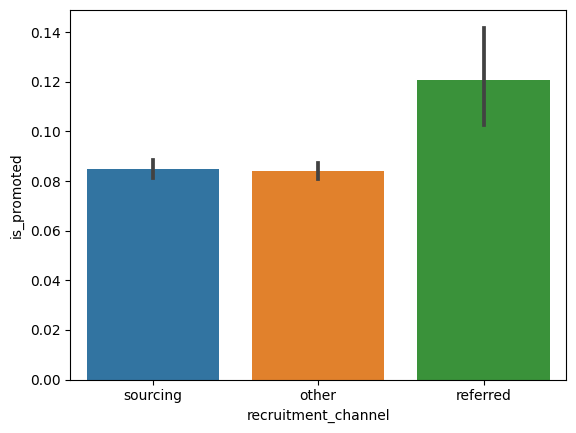

In [ ]:
sns.barplot(x='recruitment_channel',y='is_promoted',data=hr_df)

In [ ]:
hr_df["recruitment_channel"].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

<Axes: xlabel='gender', ylabel='is_promoted'>

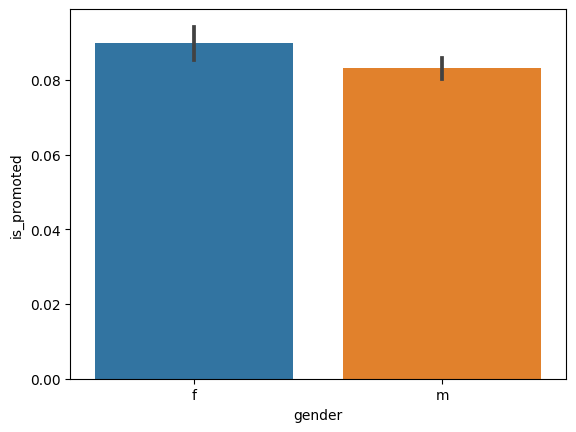

In [ ]:
sns.barplot(x='gender',y='is_promoted',data=hr_df)

In [ ]:
hr_df["gender"].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales & Marketing'),
  Text(1, 0, 'Operations'),
  Text(2, 0, 'Technology'),
  Text(3, 0, 'Analytics'),
  Text(4, 0, 'R&D'),
  Text(5, 0, 'Procurement'),
  Text(6, 0, 'Finance'),
  Text(7, 0, 'HR'),
  Text(8, 0, 'Legal')])

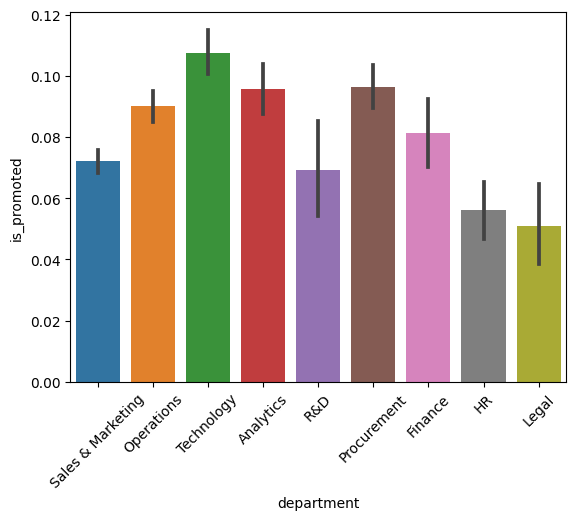

In [ ]:
sns.barplot(x='department',y='is_promoted',data=hr_df)
plt.xticks(rotation=45)

In [ ]:
hr_df["department"].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [ ]:
plt.figure(figsize=[14,10])
sns.barplot(x='region',y='is_promoted',data=hr_df)
plt.xticks(rotaion=45)

ValueError: ignored

<Figure size 1400x1000 with 0 Axes>

In [ ]:
hr_df.isna().mean()

employee_id                     0.0
no_of_trainings                 0.0
age                             0.0
previous_year_rating            0.0
length_of_service               0.0
awards_won?                     0.0
avg_training_score              0.0
is_promoted                     0.0
department_Analytics            0.0
department_Finance              0.0
department_HR                   0.0
department_Legal                0.0
department_Operations           0.0
department_Procurement          0.0
department_R&D                  0.0
department_Sales & Marketing    0.0
department_Technology           0.0
region_region_1                 0.0
region_region_10                0.0
region_region_11                0.0
region_region_12                0.0
region_region_13                0.0
region_region_14                0.0
region_region_15                0.0
region_region_16                0.0
region_region_17                0.0
region_region_18                0.0
region_region_19            

<Axes: xlabel='education', ylabel='is_promoted'>

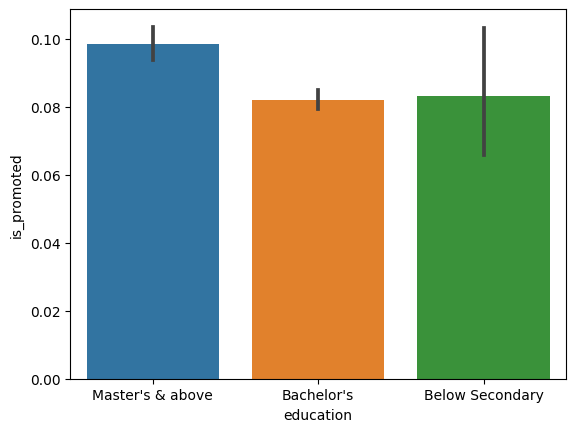

In [ ]:
sns.barplot(x='education',y='is_promoted',data=hr_df)

In [ ]:
hr_df = hr_df.dropna()

In [ ]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           48660 non-null  int64  
 1   department            48660 non-null  object 
 2   region                48660 non-null  object 
 3   education             48660 non-null  object 
 4   gender                48660 non-null  object 
 5   recruitment_channel   48660 non-null  object 
 6   no_of_trainings       48660 non-null  int64  
 7   age                   48660 non-null  int64  
 8   previous_year_rating  48660 non-null  float64
 9   length_of_service     48660 non-null  int64  
 10  awards_won?           48660 non-null  int64  
 11  avg_training_score    48660 non-null  int64  
 12  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.2+ MB


In [ ]:
# 라벨 인코딩 = object를 숫자로 변환
for i in ['department', 'region', 'education', 'gender', 'recruitment_channel']:
  print(i,hr_df[i].nunique())

department 9
region 34
education 3
gender 2
recruitment_channel 3


In [ ]:
hr_df = pd.get_dummies(hr_df, columns=['department', 'region', 'education', 'gender', 'recruitment_channel'])
hr_df.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,...,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hr_df.drop("is_promoted", axis=1), hr_df['is_promoted'], test_size=0.2, random_state=10)

# 3. 로지스텍 회귀(Logistic Regression)
* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)
- 둘중 하나를 결정하는 문제(이진 분류)를 풀기 위한 대표적인 알고리즘
* 입력 데이터와 가중치의 선형 조합으로 선형 방정식을 만듦 -> 선형 방정식의 결과를 0과 1사이의 확률값으로 변환(시그모이드 함수)
* 3개 이상의 클래스에 대한 판별을 할 수 있음
    * OvR(One-vs-Rest): 각 클래스마다 하나의 이진 분류기를 만들고, 해당 클래스를 기준으로 그 클래스와 나머지 모든 클래스를 구분하는 이진 분류를 수행 -> 가장 높은 확률을 가진 클래스를 선택
    * OvO(One-vs-One): 클래스의 개수가 N인 경우 N(N-1)/2개의 이진 분류기를 만듦 -> 각 이진 분류기는 두 개의 클래스만 구분하는데, 해당 클래스와 나머지 클래스 간에 이진 분류를 수행 -> 입력 데이터를 각 이진 분류기에 넣어 가장 많이 선택된 클래스를 최종 선택
> 대부분 OvR 전략을 선호. 클래스 간의 구분이 명확하지 않거나 데이터가 한쪽으로 치우친 경우 OvO 고려

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy_score(y_test,pred)

0.9114262227702425

In [ ]:
hr_df['is_promoted'].value_counts()

0    44428
1     4232
Name: is_promoted, dtype: int64

# 3. 혼돈 행렬(confusion matrix)

- 정밀도와 재현율(민감도)을 활용하는 평가용 지수

In [ ]:
confusion_matrix(y_test,pred)

array([[8869,    0],
       [ 862,    1]])

# 3-1. 정밀도(Precision)
- TP/ (TP+FP)
- 무조건 양성으로 판단해서 계산하는 방법
- 실제 1인 것중에 얼마 만큼을 제대로 맞췄는가?

# 3-2. 재현율(recall)
- TP/(TP+FN)
- 정확하게 감지한 양성 샘프르이 비율
- 1이라고 예측한 것 중, 얼마 만큼을 제대로 맞췄는가?
- 민감도 또는 TPR(True Positive Rate)라고도 부름

# 3-3. f1 score
- 정밀도와 재현율의 조화평균을 나타내는 지표

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
precision_score(y_test, pred) #정밀도

1.0

In [ ]:
recall_score(y_test,pred) #재현율

0.0011587485515643105

In [ ]:
f1_score(y_test, pred) #조화 평균

0.0023148148148148147

In [ ]:
# 독립변수
TempX = hr_df[['avg_training_score', 'previous_year_rating']]
# 종속변수
tempY = hr_df[['is_promoted']]

In [ ]:
lr.ceof #각 독립변수마다의기울기

AttributeError: ignored

In [ ]:
temp_lr = LogisticRegression()

In [ ]:
temp_lr.fit(TempX,tempY)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
temp_df = pd.DataFrame({'avg_training_score' : [60,80,90],
                        'previous_year_rating' : [5.0,4.5,5.0]})

In [ ]:
pred = temp_lr.predict(temp_df)
pred

array([0, 0, 0])

In [ ]:
temp_lr.coef_

array([[0.04565839, 0.51245263]])

In [ ]:
temp_lr.intercept_

array([-7.28583474])

In [ ]:
proba = temp_lr.predict_proba(temp_df)
proba

array([[0.87911419, 0.12088581],
       [0.790365  , 0.209635  ],
       [0.64892488, 0.35107512]])

In [ ]:
proba = temp_lr.predict_proba(temp_df)[:,1]
proba

array([0.12088581, 0.209635  , 0.35107512])

In [ ]:
# 임계값 변경
threshold = 0.4
pred = (proba > threshold).astype(int)
pred

array([0, 0, 0])

>> 낮은 임계값을 사용하면, 더 많은 샘플이 양성 클래스로 분류되어 재현율이 증가하고, 정밀도가 감소함

# 4. 교차 검증(Cross Validation)
- train_test_split에서 발생하는 데이터의 섞임에 따라 성능이 좌우되는 문제를 해결하기 위한 기술
- K겹(K-Fold) 교차 검증을 가장 많이 사용

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
hr_df

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,...,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,2,31,1.0,2,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
54803,3030,1,48,3.0,17,0,78,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
54804,74592,1,37,2.0,6,0,56,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
54805,13918,1,27,5.0,3,0,79,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


In [ ]:
for train_index, test_index in kf.split(range(len(hr_df))):
  print(train_index,test_index)
  print(len(train_index), len(test_index))

[ 9732  9733  9734 ... 48657 48658 48659] [   0    1    2 ... 9729 9730 9731]
38928 9732
[    0     1     2 ... 48657 48658 48659] [ 9732  9733  9734 ... 19461 19462 19463]
38928 9732
[    0     1     2 ... 48657 48658 48659] [19464 19465 19466 ... 29193 29194 29195]
38928 9732
[    0     1     2 ... 48657 48658 48659] [29196 29197 29198 ... 38925 38926 38927]
38928 9732
[    0     1     2 ... 38925 38926 38927] [38928 38929 38930 ... 48657 48658 48659]
38928 9732


In [ ]:
kf = KFold(n_splits=5, random_state=2023, shuffle=True)
kf

KFold(n_splits=5, random_state=2023, shuffle=True)

In [ ]:
acc_list = []

for train_index, test_index in kf.split(range(len(hr_df))):
  X = hr_df.drop('is_promoted', axis=1)
  y = hr_df['is_promoted']

  X_train = X.iloc[train_index]
  X_test = X.iloc[test_index]
  y_train = y.iloc[train_index]
  y_test = y.iloc[test_index]

  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  pred = lr.predict(X_test)
  accuracy_score(y_test,pred)
  acc_list.append(accuracy_score(y_test,pred))

In [ ]:
acc_list

[0.9169749280723387,
 0.9110152075626798,
 0.9126592683929305,
 0.913481298808056,
 0.9110152075626798]

In [ ]:
np.array(acc_list)

> 크로스벨리데이션을 사용하는 이유는
결과를 좋게 하기 위함이 아니라 믿을 만한 검증을 하기 위함